#**Análisis de la Industria Petrolera en Argentina**

En el presente proyecto se realiza un análisis sobre la industria petrolera de Argentina, con el objetivo de observar cuáles son las empresas líderes del sector. Se analizará el tipo de extracción más utilizado y se identificarán las empresas con menor producción. Además, se examinará el PIB del país para entender el papel que juega la industria petrolera en la economía nacional. Este análisis permitirá evaluar la estabilidad del país y su crecimiento económico en relación con la producción petrolera.

**Índice:**

**1.** Importación de librerías a utilizar.

**2.** Carga de datos.

**3.** Análisis del PIB en Argentina.

**4**. Análisis del protagonismo del petróleo en el PIB de Argentina:

    4.1. Visualización de la evolución del porcentaje del PIB.

    4.2. Estadísticas descriptivas.

    4.3. Observaciones iniciales.

    4.4. Conclusiones finales.
**5.** Análisis de la producción de petróleo, gas y agua:

    5.1. Descripción de datos.

    5.2. Exploración de datos iniciales.

    5.3. Análisis de datos.

    5.4. Conclusiones de los hallazgos.

**6.** Conclusiones finales de ambos análisis.

**7.** Puntos relevantes a tener en cuenta.


##1.  Importar librerías a ocupar:

En esta sesión se hace el importe de las librerías a ocupar para este análisis.

In [2]:
import seaborn as sns
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose

## 2. Carga de Datos:

En esta etapa inicial, se procede a cargar los datos a ocupar para los próximos análisis:

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
renta_petroleo =  pd.read_parquet('/content/drive/MyDrive/Proyecto IPB/rentas_del_petróleo_(_ del PIB)_Arg.parquet')
petroleo_gas =  pd.read_parquet('/content/drive/MyDrive/Proyecto IPB/produccion_petroleo_y_gas.parquet')
#pozos =  pd.read_parquet('/content/drive/MyDrive/Proyecto IPB/pozos.parquet')

### Análisis del Protagonismo del Petróleo en el PIB de Argentina

En este análisis, se explorará la evolución y la importancia relativa del sector petrolero dentro del Producto Interno Bruto (PIB) de Argentina. Esto  proporcionará insights sobre la contribución histórica y actual del petróleo a la economía del país.

**Visualización de la Evolución del Porcentaje del PIB:**

-     Se utilizan gráficos de líneas o de barras para visualizar cómo ha variado el porcentaje que representa la exportación de petróleo en el PIB a lo largo de los años.
-     Se destaca los años de mayor y menor impacto, identificando períodos de crecimiento o declive significativos.

**Estadísticas Descriptivas:**

-     Se calcula medidas estadísticas como la media, la mediana y la desviación estándar del porcentaje del PIB atribuible al petróleo.
-     Permite entender la dispersión de los datos y la tendencia central de la contribución del sector petrolero.

In [8]:
#Visualización: Se imprime la información con respecto a las características que contiene la data:
display(renta_petroleo.head(), renta_petroleo.info(), renta_petroleo.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 55 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    1 non-null      object 
 1   Country Code    1 non-null      object 
 2   Indicator Name  1 non-null      object 
 3   1970            1 non-null      float64
 4   1971            1 non-null      float64
 5   1972            1 non-null      float64
 6   1973            1 non-null      float64
 7   1974            1 non-null      float64
 8   1975            1 non-null      float64
 9   1976            1 non-null      float64
 10  1977            1 non-null      float64
 11  1978            1 non-null      float64
 12  1979            1 non-null      float64
 13  1980            1 non-null      float64
 14  1981            1 non-null      float64
 15  1982            1 non-null      float64
 16  1983            1 non-null      float64
 17  1984            1 non-null      float64

,Country Name,Country Code,Indicator Name,1970,1971,1972,1973,1974,1975,1976,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Argentina,ARG,Rentas del petróleo (% del PIB),0.183779,0.312887,0.359047,0.412805,1.658858,2.1189,2.359671,...,2.556499,2.253873,2.092706,0.693912,0.549552,0.663566,1.310953,1.290996,0.677056,1.544382


None

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
mean,0.183779,0.312887,0.359047,0.412805,1.658858,2.1189,2.359671,1.933853,2.190197,5.028635,...,2.556499,2.253873,2.092706,0.693912,0.549552,0.663566,1.310953,1.290996,0.677056,1.544382
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.183779,0.312887,0.359047,0.412805,1.658858,2.1189,2.359671,1.933853,2.190197,5.028635,...,2.556499,2.253873,2.092706,0.693912,0.549552,0.663566,1.310953,1.290996,0.677056,1.544382
25%,0.183779,0.312887,0.359047,0.412805,1.658858,2.1189,2.359671,1.933853,2.190197,5.028635,...,2.556499,2.253873,2.092706,0.693912,0.549552,0.663566,1.310953,1.290996,0.677056,1.544382
50%,0.183779,0.312887,0.359047,0.412805,1.658858,2.1189,2.359671,1.933853,2.190197,5.028635,...,2.556499,2.253873,2.092706,0.693912,0.549552,0.663566,1.310953,1.290996,0.677056,1.544382
75%,0.183779,0.312887,0.359047,0.412805,1.658858,2.1189,2.359671,1.933853,2.190197,5.028635,...,2.556499,2.253873,2.092706,0.693912,0.549552,0.663566,1.310953,1.290996,0.677056,1.544382
max,0.183779,0.312887,0.359047,0.412805,1.658858,2.1189,2.359671,1.933853,2.190197,5.028635,...,2.556499,2.253873,2.092706,0.693912,0.549552,0.663566,1.310953,1.290996,0.677056,1.544382


**Observaciones Iniciales:**

Al observar los datos iniciales, se identifica que el conjunto de datos consta de una única fila y 52 columnas. Cada columna representa un año de información relevante para el análisis. Es crucial notar que los tipos de datos están adecuadamente estructurados para facilitar el análisis posterior.

Para optimizar el análisis, se sugiere reorganizar los datos de manera que los años se conviertan en filas. Además, se propone eliminar las columnas `Country Name`, `Country Code` y `Indicator Name`, ya que contienen información redundante y no relevante para el análisis en cuestión.

Este enfoque simplificado permitirá una exploración más intuitiva y eficiente de la evolución de los datos a lo largo de los años, facilitando la identificación de tendencias y patrones significativos.

In [9]:
#Reorganización de datos:
renta_petroleo = renta_petroleo.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name'],
                    var_name='Año',
                    value_name='Porcentaje')


In [10]:
#Eliminación de columas redundates:
renta_petroleo = renta_petroleo.drop(columns = ['Country Name', 'Country Code', 'Indicator Name'])

In [11]:
#Visualización de tabla
renta_petroleo

,Año,Porcentaje
0,1970,0.183779
1,1971,0.312887
2,1972,0.359047
3,1973,0.412805
4,1974,1.658858
5,1975,2.118900
6,1976,2.359671
7,1977,1.933853
8,1978,2.190197
9,1979,5.028635


In [12]:
renta_petroleo.describe()

,Porcentaje
count,52.000000
mean,2.120592
std,1.404593
min,0.183779
25%,0.956470
50%,1.986532
75%,2.791998
max,5.842412


In [13]:
renta_petroleo['Porcentaje'].median()

1.98653244517432

In [30]:
Q1 = np.percentile(renta_petroleo['Porcentaje'], 25)
Q3 = np.percentile(renta_petroleo['Porcentaje'], 75)
IQR = Q3 - Q1
atipicos_mayor =  Q3 + (1.5 * IQR)
atipicos_menor = Q1 -(1.5 * IQR)
print(atipicos_mayor, atipicos_menor)

5.545289933867622 -1.7968224931443417


In [15]:
varianza_renta_petroleo = np.var(renta_petroleo['Porcentaje'])
varianza_renta_petroleo

1.9349411779104626

In [16]:
renta_petroleo.loc[renta_petroleo['Porcentaje'] > 5.4]

,Año,Porcentaje
10,1980,5.842412


### **3.2 Porcentaje del PIB del país debido al Petróleo**


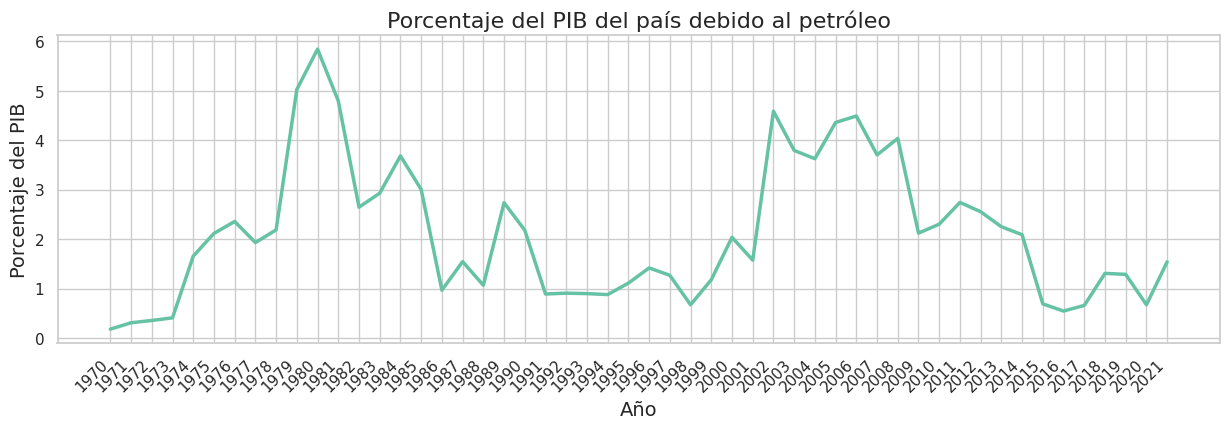

In [18]:
plt.figure(figsize=(15, 4))
sns.set(style="whitegrid", palette="Set2")
sns.lineplot(x='Año', y='Porcentaje', data=renta_petroleo, linewidth=2.5)
plt.title('Porcentaje del PIB del país debido al petróleo', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Porcentaje del PIB', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

### **3.3 Distribución del Porcentaje del PIB debido al Petróleo:**

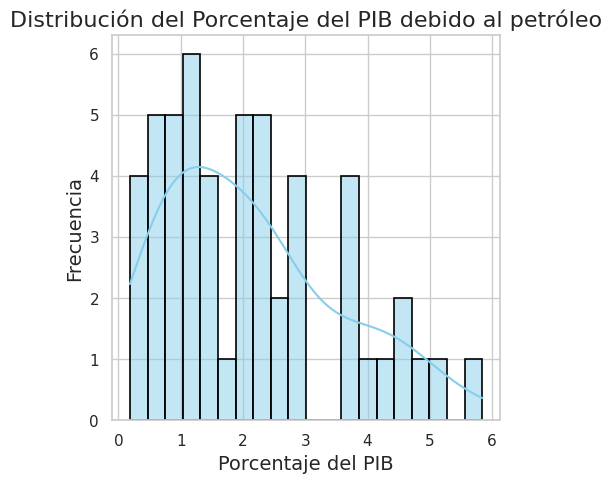

In [16]:
plt.figure(figsize=(5, 5))
sns.set(style="whitegrid")
sns.histplot(x='Porcentaje', data=renta_petroleo, bins=20, kde=True, color='skyblue', edgecolor='black', linewidth=1.2)
plt.title('Distribución del Porcentaje del PIB debido al petróleo', fontsize=16)
plt.xlabel('Porcentaje del PIB', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.show()

### **3.4 Conclusiones Finales:**

Durante los últimos 31 años, el sector petrolero en Argentina ha mostrado una notable variabilidad, con porcentajes que han fluctuado significativamente entre el 0.95% y el 5% del Producto Interno Bruto (PIB). La varianza de estos datos es de 1.9%, con una distribución estándar de 1.4%. `El rango intercuartil abarca desde 0.95% hasta 2.7%` , destacándose el año 1980 con casi un 6% del PIB como el de mayor relevancia, mientras que 1970 registra el menor porcentaje.

La volatilidad del sector petrolero ha sido notable, con caídas significativas en los años 1977, 1982, 1986, 1988, 1998, 2009, 2016 y 2020. La media del porcentaje es de 2.1%, mientras que la mediana se sitúa en 1.98%, lo que sugiere la presencia de valores atípicos hacia la derecha. Estos valores destacados confirman la importancia del año 1980 como el de mayor impacto en el sector.

Es muy probable que esta grandes volatilidades con respecto al PIB, se vean influidas con la situación económica que ha tenido Argetina durante los últimos 60 años, ya que esta se ha mantenido en crisis durante muchos periodos. Siendo un país poco estable para las grandes inversiones. También es importante destacar qué, en el sector petrolero existe mucha competencia, Argentina estaría compitiendo con países como: Arabia Saudita, Rusia, Irak, Estados Unidos, entre otros.

## **4. Análisis de la producción de petróleo, gas y agua:**


En este apartado se realiza un análisis detallado de la producción de petróleo, gas y agua, con el objetivo de identificar las empresas líderes en la industria de Argentina. Se examinará el tipo de extracción que cada empresa emplea, la cantidad de producción que generan, y se destacarán aquellas empresas que son menos competitivas en el mercado. Además, se analizarán otros aspectos relevantes para comprender mejor las dinámicas de la industria.

Este análisis es fundamental para obtener una visión más amplia del funcionamiento de la industria petrolera en Argentina. Al entender qué empresas están a la vanguardia y cuáles están rezagadas, se puede apreciar mejor el panorama competitivo. También se evaluará cómo las distintas técnicas de extracción impactan la producción total y el mercado en general.


In [19]:
pd.options.display.float_format = '{:.0f}'.format


In [20]:
display(petroleo_gas.head(), petroleo_gas.info(), petroleo_gas.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 4439562 entries, 0 to 303392
Data columns (total 16 columns):
 #   Column            Dtype  
---  ------            -----  
 0   idempresa         object 
 1   idpozo            int64  
 2   prod_pet          float64
 3   prod_gas          float64
 4   prod_agua         float64
 5   tipoextraccion    object 
 6   tipoestado        object 
 7   tipopozo          object 
 8   formprod          object 
 9   cuenca            object 
 10  provincia         object 
 11  tipo_de_recurso   object 
 12  proyecto          object 
 13  clasificacion     object 
 14  subclasificacion  object 
 15  fecha_data        object 
dtypes: float64(3), int64(1), object(12)
memory usage: 575.8+ MB


,idempresa,idpozo,prod_pet,prod_gas,prod_agua,tipoextraccion,tipoestado,tipopozo,formprod,cuenca,provincia,tipo_de_recurso,proyecto,clasificacion,subclasificacion,fecha_data
0,Z001,145604,9,0,1845,Bombeo Mecánico,Extracción Efectiva,Petrolífero,PROS,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,2020-01-31
1,Z001,32186,0,0,0,Otros Tipos de Extracción,En Reserva de Gas,Gasífero,FIMP,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,2020-01-31
2,Z001,32171,0,0,0,Bombeo Mecánico,En Inyección Efectiva,Inyección de Agua,PROS,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,SERVICIO,INYECTOR DE AGUA,2020-01-31
3,Z001,145622,0,0,0,Bombeo Mecánico,Abandonado,Petrolífero,PROS,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,2020-01-31
4,Z001,144117,0,0,0,Sin Sistema de Extracción,En Reserva de Gas,Gasífero,FIMP,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,2020-01-31


None

,idpozo,prod_pet,prod_gas,prod_agua
count,4439562,4439562,4439562,4439562
mean,102478,46,71,348
std,42741,289,832,1188
min,212,-0,-12,-32
25%,70219,0,0,0
50%,110590,0,0,0
75%,133606,14,0,27
max,165405,16513,101789,204924


### **4.1 Descripción de datos:**

| Nombre de la Columna  | Significado               | Descripción                                                                                 |
|-----------------------|---------------------------|---------------------------------------------------------------------------------------------|
| `idempresa`           | ID de Empresa             | Identificador único de la empresa que opera el pozo.                                        |
| `idpozo`              | ID de Pozo                | Identificador único del pozo.                                                               |
| `prod_pet`            | Producción de Petróleo    | Cantidad de petróleo producido por el pozo.                                                 |
| `prod_gas`            | Producción de Gas         | Cantidad de gas producido por el pozo.                                                      |
| `prod_agua`           | Producción de Agua        | Cantidad de agua producida por el pozo.                                                     |
| `tipoextraccion`      | Tipo de Extracción        | Método utilizado para extraer los recursos del pozo.  |
| `tipoestado`          | Tipo de Estado            | Estado operativo del pozo .                                |
| `tipopozo`            | Tipo de Pozo              | Clasificación del pozo según su uso o características.      |
| `formprod`            | Formación Productiva      | Formación geológica de la cual se extraen los recursos.                                     |
| `cuenca`              | Cuenca                    | Cuenca sedimentaria donde se encuentra el pozo.                                             |
| `provincia`           | Provincia                 | Provincia donde se ubica el pozo.                                                           |
| `tipo_de_recurso`     | Tipo de Recurso           | Tipo de recurso natural extraído.                                     |
| `proyecto`            | Proyecto                  | Con proyecto o Sin proyecto.                                                 |
| `clasificacion`       | Clasificación             | Clasificación del pozo según criterios específicos (alto, medio, bajo).               |
| `subclasificacion`    | Subclasificación          | Subclasificación del pozo para una categorización más detallada.                            |
| `fecha_data`          | Fecha de Datos            | Fecha en la cual se recopilaron o actualizaron los datos.                 

La tabla contiene 16 columnas y varias filas, de las cuales 12 columnas contienen valores categóricos, 1 columna tiene datos enteros y 3 columnas contienen datos flotantes.

Esta tabla proporciona información detallada sobre el funcionamiento de los pozos, incluyendo la producción, los tipos de extracción, y otros aspectos relevantes. Esta información es extremadamente útil para realizar análisis sobre el funcionamiento del mercado del petróleo.

**Exploración Inicial de los Datos**
1. Cantidad de empresas dentro de los datos.
2. Producción de petróleo, gas y agua. Ver la variación.
3. Cantidad de tipo de extracciones.
4. Cantiad de tipos de estado que contiene.
5. Cantidad de pozos diferentes.
6. Contar las provincias a analizar.
7. Contar los tipos de recursos naturales extraidos.
8. Proyectos.
9. Las clasficaciones y subclasificaciones que tienen de los pozos.

**Con respecto a los datos observados, se llevarán a cabo los siguientes análisis:**

1. Producción de petróleo, gas y agua, por empresa y por región.
2. Tipos de extracción existentes y cuáles son las más utilizadas.
3. Tipos de estado existentes y cuáles son los más utilizados.
4. Pozos más comunes.
5. Provincias más utilizadas para la ubicación de pozos.
6. Clasificaciones y subclasificaciones de pozos más comunes.
7. Año con mayor producción.
8. Distintas combinaciones de análisis que se realizarán a medida que se avance con los análisis previos.ta tabla te sea útil.

### **4.2 Exploración de datos iniciales:**

In [22]:
#Cantidad de empresas dentro de los datos:
len(petroleo_gas['idempresa'].unique())

66

In [24]:
# Se eliminan los datos con valores igual a cero:
petroleo_gas_l = petroleo_gas[(petroleo_gas['prod_pet'] != 0) &
            (petroleo_gas['prod_gas'] != 0) &
            (petroleo_gas['prod_agua'] != 0)]

#### **4.2.1 Diagrama de Caja para observar variación de producción de Petróleo, Gas y Agua por empresa:**

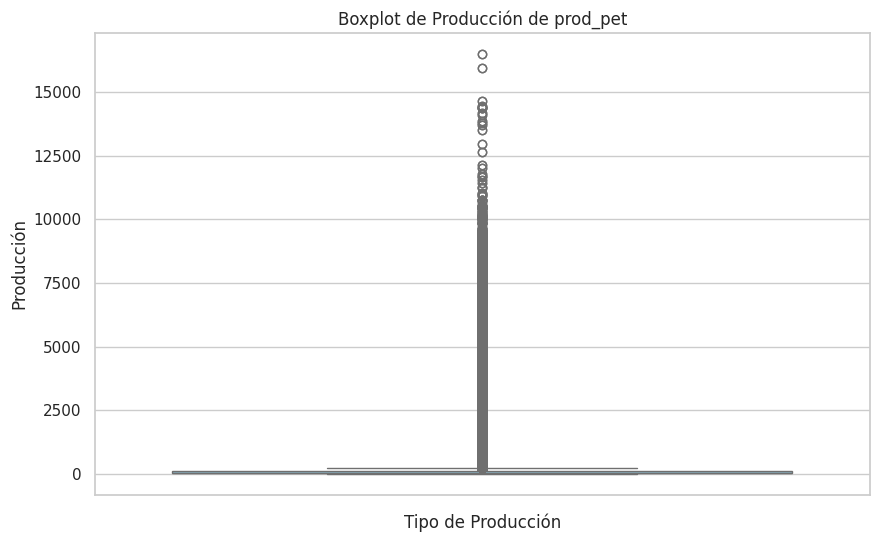

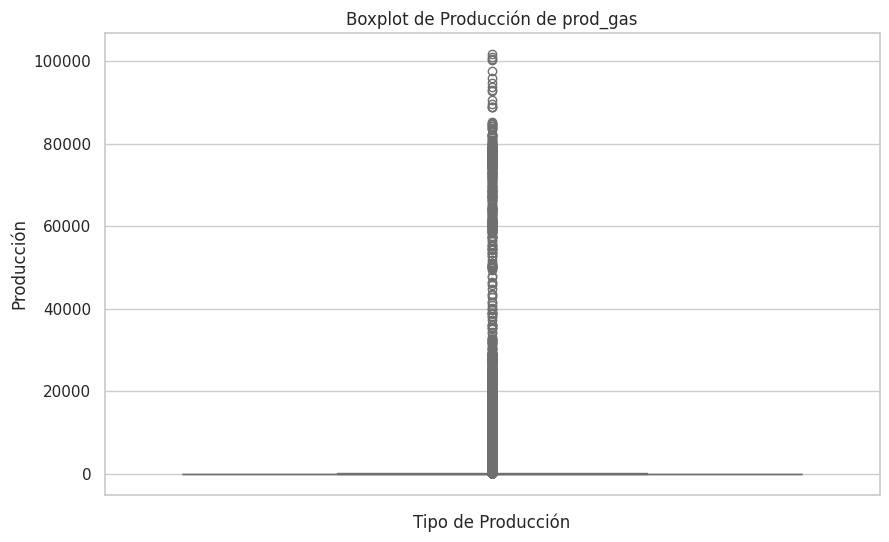

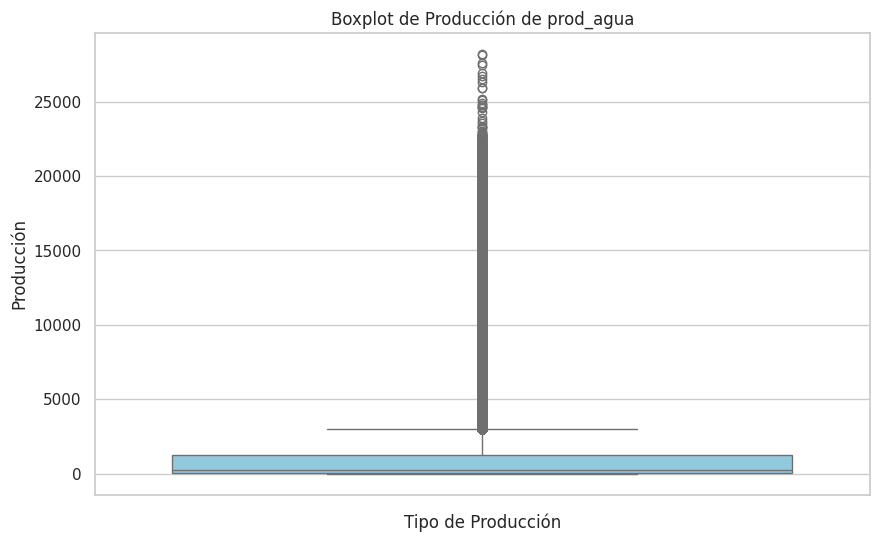

In [25]:
#Producción de petróleo, gas y agua. Ver la variación:
tipos = ['prod_pet',	'prod_gas',	'prod_agua']
for i in tipos:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=petroleo_gas_l[i], orient='v',color='skyblue')
    plt.title(f'Boxplot de Producción de {i}')
    plt.ylabel('Producción')
    plt.xlabel('Tipo de Producción')

##### **Conclusiones generales de Diagramas:**


Este diagrama proporciona información relevante, ya que muestra que existe una gran cantidad de valores atípicos en la cantidad de producción por empresa. En el sector, hay una amplia variabilidad, con muchas empresas pequeñas y algunas con una producción más elevada. La industria está compuesta en gran parte por pequeñas empresas, lo que explica que el rango intercuartil se encuentre entre 0 y aproximadamente 1,000 unidades. Los valores atípicos, es decir, las producciones de las empresas más grandes, comienzan alrededor de las 2,500 unidades, dependiendo del tipo de producción.

Se realizará un análisis más profundo excluyendo los valores atípicos, con el objetivo de entender mejor el funcionamiento de la mayoría de las empresas en la industria. Este enfoque permitirá una evaluación más precisa de las dinámicas internas del sector y proporcionará una comprensión más clara de cómo operan las empresas de menor tamaño.

In [43]:
prodl_pet = []
prodl_gas = []
prodl_agua = []

for t in tipos:
  Q1_p = np.percentile(petroleo_gas_l[t], 25)
  Q3_p = np.percentile(petroleo_gas_l[t], 75)
  IQR_p = Q3_p - Q1_p
  atipicos_mayor_p = Q3_p + (1.5 * IQR_p)
  atipicos_menor_p = Q1_p -(1.5 * IQR_p)

  for value in petroleo_gas_l[t]:
    if atipicos_menor_p < value < atipicos_mayor_p:
      if t == 'prod_pet':
        prodl_pet.append(value)
      elif t == 'prod_gas':
        prodl_gas.append(value)
      elif t == 'prod_agua':
        prodl_agua.append(value)


In [48]:
l = [prodl_pet, prodl_gas, prodl_agua ]


In [70]:
#Cantidad de tipo de extracciones:
print(len(petroleo_gas_l['tipoextraccion'].unique()))
petroleo_gas_l['tipoextraccion'].unique()


11


array(['Cavidad Progresiva', 'Bombeo Mecánico', 'Electrosumergible',
       'Surgencia Natural', 'Bombeo Hidráulico', 'Plunger Lift',
       'Gas Lift', 'Otros Tipos de Extracción', 'Pistoneo (Swabbing)',
       'Sin Sistema de Extracción', 'Jet Pump'], dtype=object)

In [71]:
#Cantidad de tipos de estado que contiene:
print(len(petroleo_gas_l['tipoestado'].unique()))
petroleo_gas_l['tipoestado'].unique()

15


array(['Extracción Efectiva', 'En Inyección Efectiva',
       'Otras Situación Activo', 'Parado Transitoriamente',
       'En Espera de Reparación', 'En Reparación', 'En Estudio',
       'A Abandonar', 'Otras Situación Inactivo',
       'Mantenimiento de Presión', 'Parado Alta Relación Agua/Petróleo',
       'En Reserva para Recup. Sec./Asist.', 'En Reserva de Gas',
       'Abandono Temporario', 'Abandonado'], dtype=object)

In [72]:
#Cantidad de pozos diferentes:
print(len(petroleo_gas_l['tipopozo'].unique()))
petroleo_gas_l['tipopozo'].unique()

7


array(['Petrolífero', 'Gasífero', 'Inyección de Agua', 'Otro tipo',
       'Sumidero', 'Acuífero', 'Inyección de Gas'], dtype=object)

In [73]:
#Contar las provincias a analizar:
print(len(petroleo_gas_l['provincia'].unique()))
petroleo_gas_l['provincia'].unique()

11


array(['Chubut', 'Santa Cruz', 'Tierra del Fuego', 'Neuquén', 'Mendoza',
       'Rio Negro', 'Salta', 'Estado Nacional', 'La Pampa', 'Jujuy',
       'Formosa'], dtype=object)

In [74]:
#Contar los tipos de recursos naturales extraidos:
print(len(petroleo_gas_l['tipo_de_recurso'].unique()))
petroleo_gas_l['tipo_de_recurso'].unique()

4


array(['CONVENCIONAL', 'NO CONVENCIONAL', 'SIN RESERVORIO',
       'NO DISCRIMINADO'], dtype=object)

In [75]:
#Proyectos:
print(len(petroleo_gas_l['proyecto'].unique()))
petroleo_gas_l['proyecto'].unique()

2


array(['Sin Proyecto', 'GAS PLUS'], dtype=object)

In [76]:
#Clasificación de los pozos:
print(len(petroleo_gas_l['clasificacion'].unique()))
petroleo_gas_l['clasificacion'].unique()

5


array(['EXPLOTACION', 'EXPLORACION', 'SD', 'SERVICIO', 'ALMACENAMIENTO'],
      dtype=object)

In [77]:
#Subclasificación de los pozos:
print(len(petroleo_gas_l['subclasificacion'].unique()))
petroleo_gas_l['subclasificacion'].unique()

12


array(['DESARROLLO', 'AVANZADA', 'EXTENSION', 'SD', 'EXPLORACION',
       'EXPLORATORIO PROFUNDO', 'INYECTOR DE AGUA', 'ESTUDIO',
       'EXPLORATORIO SOMERO', 'INYECTOR DE VAPOR', 'CONTROL',
       'INYECTOR DE GAS'], dtype=object)

**Comentarios**


1. En el ámbito de la industria extractiva, se identifican un total de 17 estados diferentes en los que se pueden encontrar los pozos. Estos estados incluyen: Extracción Efectiva, En Reserva de Gas, En Inyección Efectiva, Abandonado, En Estudio, En Reserva para Recuperación Secundaria/Asistida, Abandono Temporario, A Abandonar, Parado Transitoriamente, Otras Situaciones Activas, En Espera de Reparación, Parado Alta Relación Gas/Petróleo, Parado Alta Relación Agua/Petróleo, Mantenimiento de Presión, En Reparación, Otras Situaciones Inactivas, y SD.

2. En cuanto a la tipología de pozos, se distinguen 12 categorías diferentes: Petrolífero, Gasífero, Inyección de Agua, Otro tipo, Sumidero, Acuífero, Inyección de Gas, Extractor de Almacenamiento, SD, Monitoreo de Almacenamiento, Bidireccional de Almacenamiento, e Inyector de Almacenamiento.

3. Geográficamente, las operaciones se extienden a través de 11 provincias: Río Negro, Chubut, Santa Cruz, Tierra del Fuego, Mendoza, Neuquén, Salta, Estado Nacional, Jujuy, La Pampa, y Formosa.

4. Los recursos extraídos se clasifican en 4 tipos: Convencional, No Convencional, Sin Reservorio y No Discriminado.

5. En la columna correspondiente a proyectos, se presentan solo dos opciones: Sin proyecto y Gas Plus.

6. La clasificación de los pozos se desglosa en 5 categorías: Explotación, Exploración, Servicio, SD y Almacenamiento.

7. Finalmente, en términos de subclasificación, se identifican 16 subcategorías: Desarrollo, Exploración, Inyector de Agua, Avanzada, Sumidero, Control, SD, Extensión, Exploratorio Somero, Inyector de Vapor, Exploratorio Profundo, Estudio, Inyector Terciaria, Inyector de Gas, Productor de Agua, y Almacenamiento de Gas.


### **4.3. Análisis de los datos:**

In [79]:
# Producción de petróleo, gas y agua por empresa y por región:

#Petróleo:
p = petroleo_gas_l.groupby('idempresa')['prod_pet'].agg(['sum']).sort_values(by = 'sum',ascending = False)
print('Petróleo')
print(p.tail(10))
print(p.head(10))

#Gas
g = petroleo_gas_l.groupby('idempresa')['prod_gas'].agg(['sum']).sort_values(by = 'sum',ascending = False)
print('Gas')
print(g.tail(10))
print(g.head(10))

#Agua
a = petroleo_gas_l.groupby('idempresa')['prod_agua'].agg(['sum']).sort_values(by = 'sum',ascending = False)
print('Agua')
print(a.tail(10))
print(a.head(10))

Petróleo
            sum
idempresa      
ALP       18926
VNO       18473
ECP1      16302
JEM        6865
GREC       6824
CRI        4126
CAP        3733
EME        2757
ARTR       1742
INER        242
               sum
idempresa         
YPF       94828110
PAL       24615421
VST       10652474
SHE       10312943
PLU        5753114
VIS        5700969
TPT        5215680
EMEA       3150829
TAU        2655826
APS        1964379
Gas
           sum
idempresa     
COH       5394
QUIN      3223
GREC      3026
JEM       2008
ERR       1615
ECP1      1555
CAP        580
EME        250
CRI         16
INER         2
               sum
idempresa         
YPF       58230391
TPT       47975533
TAU       43851992
PAL       17933895
PLU       13363720
CGC       12311668
PAM        8281532
SIPA       4723875
APS        4161863
EMEA       1974004
Agua
            sum
idempresa      
QUIN      64734
WDA       55806
JEM       30859
ARTR      30388
PIE       15628
VNO       13644
ALP        8704
INER      

**4.3.1. Hallasgos**

En el análisis de la producción de petróleo, gas y agua por parte de diferentes empresas, se observan algunos patrones y líderes claros en la industria.

 **Producción de Petróleo**

Las empresas con mayor producción de petróleo son:
1. **YPF**: 104,744,347 millones
2. **PAL**: 30,102,953 millones
3. **SHE**: 11,239,125 millones

Las empresas que no presentan producción de petróleo son: SDVA, PTM, ANAR, ENE1, AESA y PPAM.

**Producción de Gas**

Las empresas con mayor producción de gas son:
1. **YPF**: 90,866,537 millones
2. **TAU**: 61,105,392 millones
3. **TPT**: 48,509,922 millones

Las empresas sin producción de gas son: ENE1, SDVA, PSM, CAPE, HAT, PPAM, ANAR, AESA, ISIM y ZOO1.

**Producción de Agua**

Las empresas con mayor producción de agua son:
1. **YPF**: 630,896,796 millones
2. **PAL**: 458,885,816 millones
3. **CAP**: 79,280,181 millones

Las empresas sin producción de agua son: PSM, SDVS, PTM, PPAM, ANAR, PET, AESA, HLUC y ENE1.

**Análisis General de Producción**

Se puede notar que la empresa líder en la industria es **YPF**, ya que es la que produce la mayor cantidad de agua, petróleo y gas. Un punto importante es que un porcentaje significativo de la producción de YPF depende del agua.

En cuanto a las empresas sin producción, **ENE1** destaca por no presentar producción en ninguna de las tres categorías, lo que sugiere que podría haber cerrado sus operaciones.

Específicamente en la producción de petróleo, se observa que YPF produce más del 70% en comparación con la empresa en segundo lugar (PAL). Esto indica que YPF tiene una alta capacidad de producción, lo que la posiciona como una empresa eficiente y competitiva en el mercado mundial del petróleo.

<ipython-input-80-d42b4c8e722c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='tipoextraccion', y='frecuencia', data=conteo_tipoextraccion, palette='Set2')


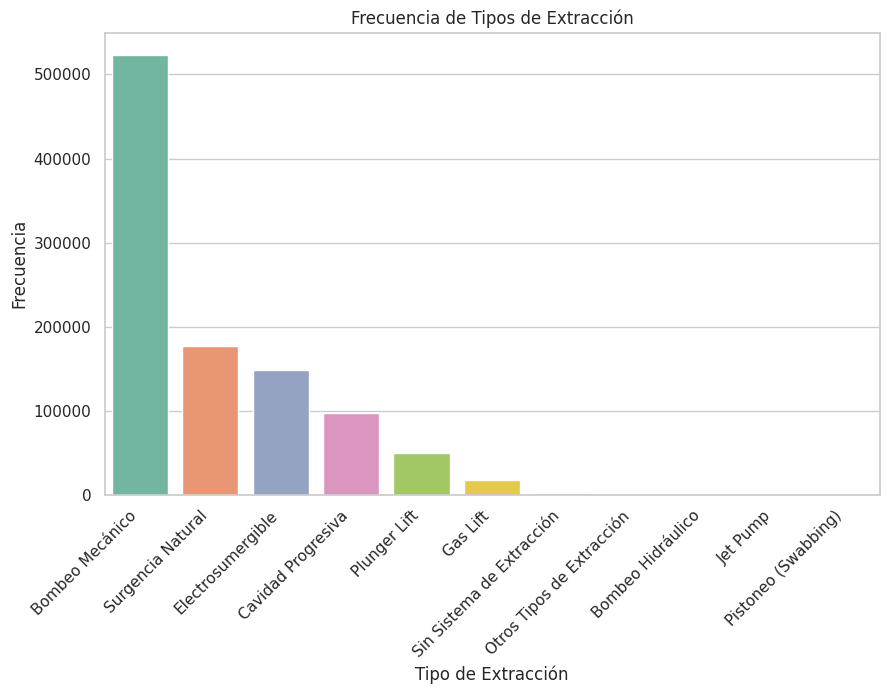

In [80]:
conteo_tipoextraccion = petroleo_gas_l['tipoextraccion'].value_counts().reset_index()
conteo_tipoextraccion.columns = ['tipoextraccion', 'frecuencia']
conteo_tipoextraccion = conteo_tipoextraccion.sort_values(by='frecuencia', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='tipoextraccion', y='frecuencia', data=conteo_tipoextraccion, palette='Set2')
plt.title('Frecuencia de Tipos de Extracción')
plt.xlabel('Tipo de Extracción')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()


Se puede observar que el sistema de extracción más utilizado es el Bombeo Mecánico, seguido por Surgencia Natural. Sin embargo, es notable que existe una cantidad significativa de empresas que no tienen un sistema de extracción registrado. Es probable que muchas de estas empresas sean más pequeñas en comparación, mientras que el Bombeo Mecánico es utilizado principalmente por las empresas líderes en la industria.

Otro punto importante es que hay sistemas de extracción como Lif, Bombeo Hidráulico, Jemp Pump, y SD, con un total de 9 empresas que utilizan estos métodos. Aunque existen 12 tipos u opciones de extracción, la mayoría de las empresas se agrupan en solo unos pocos métodos, destacando el Bombeo Mecánico como el más utilizado, representando aproximadamente un 8% del total.

Este análisis resalta que, mientras algunos métodos de extracción son predominantes, una variedad considerable de sistemas es utilizada en menor medida, reflejando la diversidad en las prácticas de extracción dentro de la industria.

<ipython-input-82-ab9ad72b9064>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = c['tipopozo'], y = c['Frecuecia'], data = c, palette = 'Set2')


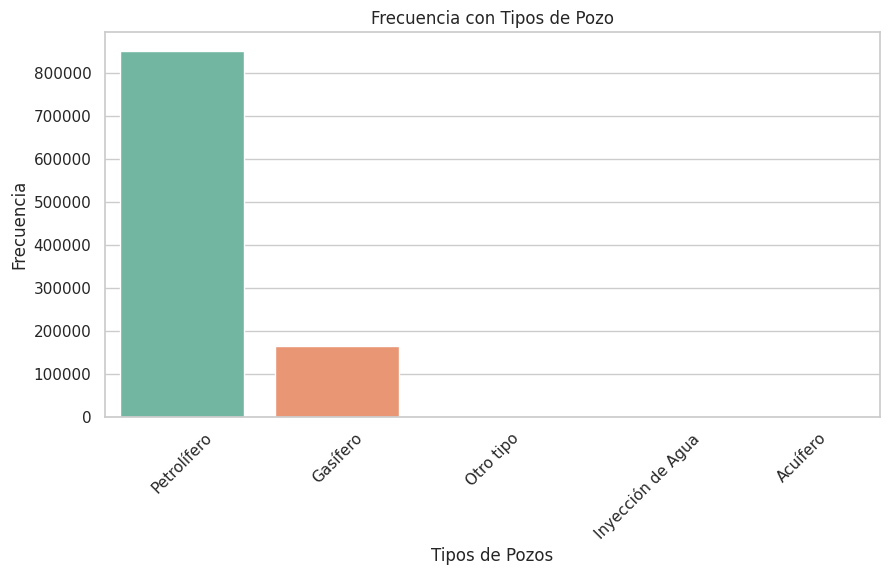

In [82]:
# Pozos más comunes:
c = petroleo_gas_l['tipopozo'].value_counts().reset_index().head()
c.columns = ['tipopozo', 'Frecuecia']

plt.figure(figsize = (10,5))
sns.barplot(x = c['tipopozo'], y = c['Frecuecia'], data = c, palette = 'Set2')
plt.title('Frecuencia con Tipos de Pozo')
plt.xlabel('Tipos de Pozos')
plt.ylabel('Frecuencia')
plt.xticks(rotation = 45)
#plt.grid(True)
plt.show()


Entre los tipos de pozos más comunes, el pozo petrolífero destaca con una frecuencia de uso de 900,000, seguido en menor medida por el pozo gasífero.

Esta información es relevante porque indica que la mayoría de las empresas optan por utilizar pozos petrolíferos, cuyo objetivo es extraer petróleo crudo y gas natural de reservorios subterráneos. Por otro lado, los pozos gasíferos se utilizan para transformar materiales sólidos en gas, un proceso que involucra la conversión de materiales sólidos en hidrocarburos gaseosos, en lugar de extraer directamente de reservorios naturales.


<ipython-input-83-3c1b07bf9d06>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = p['provincia'], y = p['Frecuencia'], data = p, palette = 'Set2')


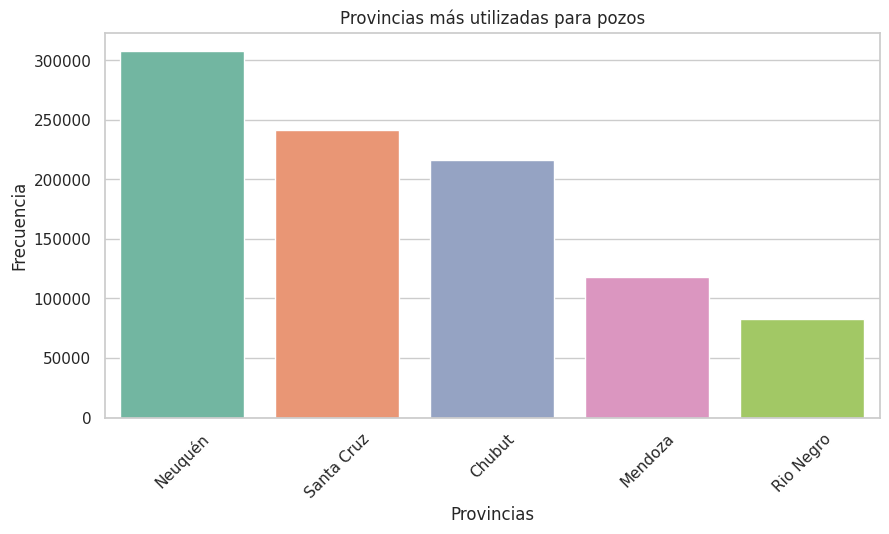

In [83]:
# Provincias más utilizadas para la ubicación de pozos:
p = petroleo_gas_l['provincia'].value_counts().reset_index().head(5)
p.columns = ['provincia', 'Frecuencia']

plt.figure(figsize = (10,5))
sns.barplot(x = p['provincia'], y = p['Frecuencia'], data = p, palette = 'Set2')
plt.title('Provincias más utilizadas para pozos')
plt.xlabel('Provincias')
plt.ylabel('Frecuencia')
plt.xticks(rotation = 45)
plt.show()

La zonas más popular en esta idustria sería Neuquén, Santa Cruz, Chubut, Mendoza y Río Negro.

**Comentarios sobre los 3 primeros lugares:**

**Neuquén** es la zona más popular para la producción de petroleo, agua y gas, ya que es donde se encuentra ubicada Vacas Muertas, que es una zona rica en
yacimientos de shale oil y shale gas más importantes del mundo. Esta formación geológica contiene grandes cantidades de petróleo y gas en formaciones de roca de esquisto, lo que la convierte en una zona clave para la exploración y producción de hidrocarburos.
Además, la región tiene una geología que favorece la acumulación de petróleo y gas, con formaciones ricas en materia orgánica y una estructura geológica que facilita la extracción.

Con respecto a **Santa Cruz**, esta tiene importantes reservas de petróleo en la Cuenca del Golfo San Jorge, una de las principales cuencas petroleras de Argentina. La región contiene varios campos productivos de petróleo.
Destacar que esta región ha sido históricamente una de las principales productoras de petróleo del país, con importantes campos como el de Cerro Dragón, que es uno de los mayores yacimientos de petróleo en Argentina.

**Chubut** también se encuentra en la Cuenca del Golfo San Jorge, que es rica en petróleo y gas. Los yacimientos en Chubut son una fuente significativa de producción de hidrocarburos. Ha sido históricamente un gran productor de petróleo, con una infraestructura establecida para la extracción y procesamiento de estos recursos.





<ipython-input-85-c9761cb9d485>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = c['Clasificación'], y = c['Frecuencia'], data = c, palette = 'Set2')


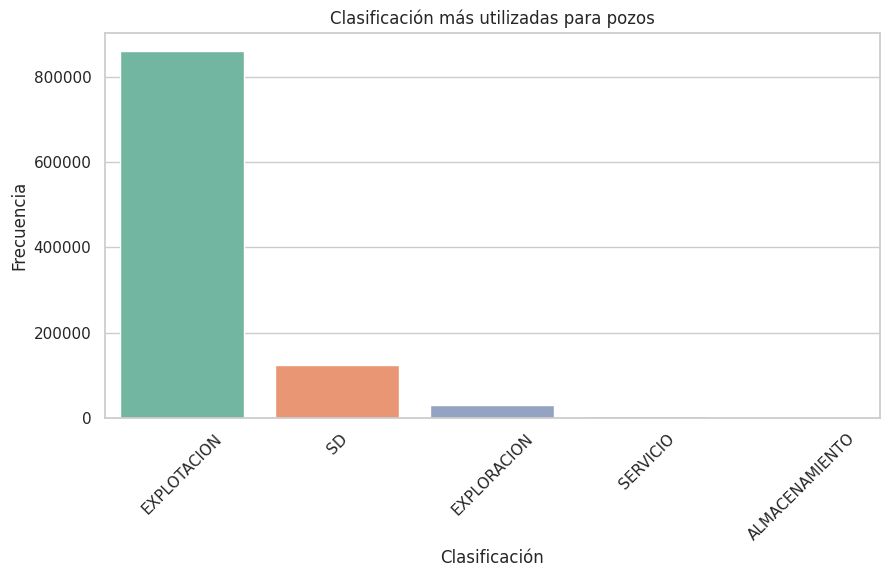

In [85]:
# Clasificaciones y subclasificaciones de pozos más comunes:
c = petroleo_gas_l['clasificacion'].value_counts().reset_index().head()
c.columns = ['Clasificación', 'Frecuencia']

plt.figure(figsize = (10,5))
sns.barplot(x = c['Clasificación'], y = c['Frecuencia'], data = c, palette = 'Set2')
plt.title('Clasificación más utilizadas para pozos')
plt.xlabel('Clasificación')
plt.ylabel('Frecuencia')
plt.xticks(rotation = 45)
plt.show()

**4.3.3 Análisis de Clasificación de los Tipos de Pozos:**

En cuanto a la clasificación más utilizada para pozos, la explotación se destaca con una frecuencia superior a los 80,000, seguida, aunque muy por debajo, por SD, con aproximadamente 13,000 pozos. Esta preponderancia es lógica, ya que la fase de explotación es crucial para la extracción y producción de hidrocarburos de un reservorio subterráneo. Cabe destacar que el tipo de pozo más utilizado es el petrolífero.

En comparación con otras clasificaciones, la explotación acapara gran parte de la atención, subrayando su importancia en la industria de los hidrocarburos. Los demás tipos de clasificación quedan en un segundo plano, ya que la explotación domina en lo que respecta a la cantidad y relevancia de los pozos.

<ipython-input-86-95c366f0e4e7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = s['Subclasificacion'], y = s['Frecuencia'], data = p, palette = 'Set2')


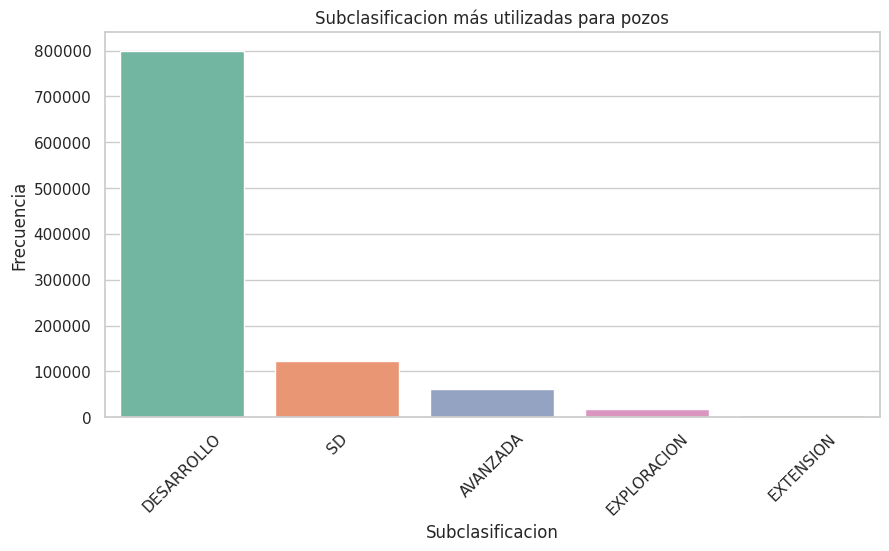

In [86]:
# Distintas combinaciones de análisis que se realizarán a medida que se avance con los análisis previos.ta tabla te sea útil:
s = petroleo_gas_l['subclasificacion'].value_counts().reset_index().head(5)
s.columns = ['Subclasificacion', 'Frecuencia']

plt.figure(figsize = (10,5))
sns.barplot(x = s['Subclasificacion'], y = s['Frecuencia'], data = p, palette = 'Set2')
plt.title('Subclasificacion más utilizadas para pozos')
plt.xlabel('Subclasificacion')
plt.ylabel('Frecuencia')
plt.xticks(rotation = 45)
plt.show()


Viendo las **Subclasificaciones** más utilizadas para los pozos, la más común es la de **Desarrollo**, con una frecuencia de 80,000. Esto solo reafirma las conclusiones mencionadas anteriormente.

# **Conclusiones Finales de Datos**
Con respecto a los objetivos del proyecto, los cuales eran tener una visión más clara acerca del funcionamiento del mercado petrolero, se pueden extraer varias conclusiones:

**Variabilidad del PIB en Argentina:**

1. Argentina ha mostrado una notable variabilidad en su PIB, indicando grandes desafíos para mantener su economía estable. Esto es una alerta significativa para la toma de decisiones de inversión o acuerdos con empresas argentinas.
2. El PIB relacionado con el petróleo tiene un protagonismo menor al 5% en su mayoría, con una mediana y media cerca del 2.6%. La participación más alta fue del 5%, hace más de 30 años.


**Liderazgo de YPF:**

-     YPF es la empresa líder en producción de petróleo, gas y agua en Argentina, destacándose significativamente frente a sus competidores nacionales.
-     Su protagonismo en el mercado petrolero argentino es notable.

**Presencia de Empresas Pequeñas:**

-     La industria petrolera de Argentina está compuesta en gran parte por empresas más pequeñas, que ocupan un 30% de la producción total.
-     Hay más de 50 empresas petroleras pequeñas, con una media de producción que llega a un máximo de 1000 pozos, dependiendo si es agua, gas o petróleo.

**Cierre de Empresas y Competencia Internacional:**

-     Muchas empresas han cerrado por razones desconocidas. La industria está dominada por empresas de Irak, Rusia y Ucrania, lo que hace que la entrada al mercado sea compleja y requiera una gran cantidad de inversión.

**Región de Neuquén:**

-     Neuquén es la región con mayor producción, destacándose por la zona de Vaca Muerta, conocida por su abundancia de recursos naturales.

**Exportación de Petróleo Crudo y Gas Natural:**

-     Argentina en su mayoría exporta petróleo crudo y gas natural extraídos de reservorios subterráneos.

**Este análisis es fundamental para identificar los competidores de YPF y entender cómo esta empresa, a pesar de los conflictos internos y nacionales, ha logrado mantenerse como líder del mercado argentino.**